Project Brief
https://dailypythonprojects.substack.com/p/scrape-a-value-every-minute-from
Your task for this project is to write a Python script that scrapes the temperature from the following page every minute:

https://forecast.weather.gov/MapClick.php?lat=40.7146&lon=-74.0071

Here is what the webpage looks like. The highlighted text is the value you need to scrape.
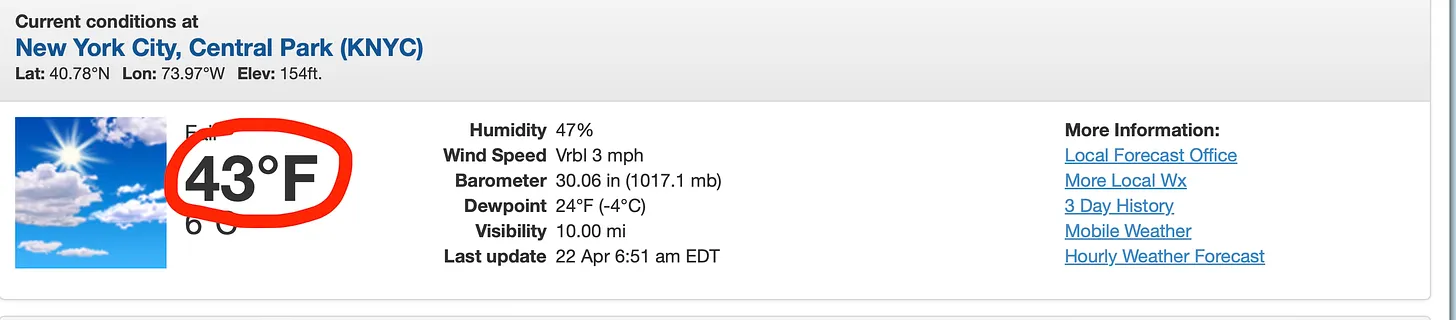

Expected Output
Once executed, the program should run continuously scraping the temperature value every minute and printing it out on the command line:
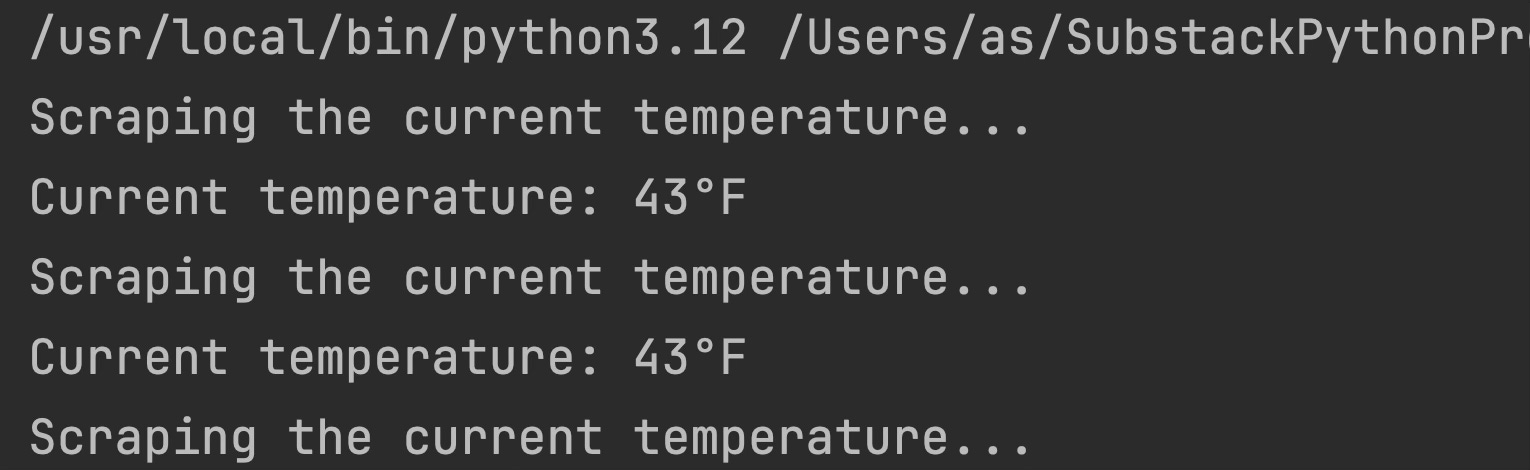

Environment Setup Instructions
Install the required libraries.

`pip install beautifulsoup4 requests schedule`

Run the app with python main.py

Resources
Learn how to use BeautifulSoup and requests to scrape text from a webpage:
https://pythonhow.com/how/scrape-a-wikipedia-page/

Learn how to use the schedule library to schedule Python code:
https://schedule.readthedocs.io/en/stable/

In [ ]:
import requests  #library to make http requests
import re  #regex
import schedule
import time

schedule.clear()  #clear the schedule, in jupyter, old schedules tend to be persistent

url_columbus_ga = "https://forecast.weather.gov/MapClick.php?lat=32.4686&lon=-84.9805"
place = "Columbus, GA"

#schedule needs a function to call
def job():
  response = requests.get(url_columbus_ga, headers={"Cache-Control": "no-cache, max-age=0"})

  #regex searches to find the temp in F and C
  temp_f = re.search("myforecast-current(.+?)>(.+?)&deg;F", response.text)
  temp_c = re.search("myforecast-current(.+?)>(.+?)&deg;C", response.text)
  print("The temperature in", place, "at", time.asctime() ,"is:")
  print(temp_f.group(2), "F /", temp_c.group(2), "C")  #with 2 wildcard queries in each search, the temperature is in group 2 as returned by re.search()
#end job function

schedule.every(1).minute.do(job)

job()
while True:
  schedule.run_pending()
  time.sleep(1)
